In [28]:
from qiskit.quantum_info import random_density_matrix, Operator, Statevector, DensityMatrix, random_unitary, random_statevector, random_clifford, Pauli, SparsePauliOp
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.circuit.library import RXGate, RYGate, RZGate
from qiskit.visualization import *

import numpy as np
import pandas as pd
import scipy as sp
from math import pi, cos, sin, sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from itertools import product


Optimization Step: 0
phi Values: [-0.16483849  0.          0.18429185 -0.16483849]
Maximum Probability: 0.9547158964528217

Optimization Step: 1
phi Values: [-0.29361991  0.          0.17979605 -0.10865413]
Maximum Probability: 0.9957210468133955

Optimization Step: 2
phi Values: [-0.30756264  0.          0.19658341 -0.04798546]
Maximum Probability: 0.9999392612703987

Optimization Step: 3
phi Values: [-0.30424039  0.          0.19246041 -0.0479201 ]
Maximum Probability: 0.9999628183233862

Optimization Step: 4
phi Values: [-0.30366317  0.          0.19520431 -0.04666448]
Maximum Probability: 0.9999945222909682

Optimization Step: 5
phi Values: [-0.30434015  0.          0.1960985  -0.04659503]
Maximum Probability: 0.9999998367629591

Optimization Step: 6
phi Values: [-0.30407335  0.          0.19625478 -0.04642432]
Maximum Probability: 0.9999999966163249

Optimization Step: 7
phi Values: [-0.30410506  0.          0.19621466 -0.04645265]
Maximum Probability: 0.9999999999956357

Optimiza

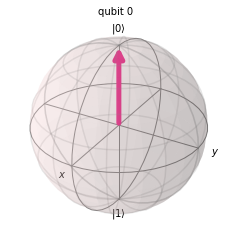

In [39]:
T = random_unitary(2)
U = None  # Initialize U
def Rotation(phi, theta):
     return Operator([[(cos(theta)**2 + np.exp(1j*phi)*sin(theta)**2), ((1-np.exp(1j*phi))*cos(theta)*sin(theta))],
                       [((1-np.exp(1j*phi))*cos(theta)*sin(theta)), (sin(theta)**2 + np.exp(1j*phi)*cos(theta)**2)]])
# def Rotation2(phi, theta):
#      return Operator([[(cos(phi)**2 + np.exp(phi)*sin(phi)**2), ((1-np.exp(phi)*cos(phi)*sin(phi)))],
#                        [((1-np.exp(phi)*cos(phi)*sin(phi))), (sin(phi)**2 + np.exp(1j*phi)*cos(phi)**2)]])
# Rotation2(0,2.0) @ Rotation2(0,2.0).conjugate()
import numpy as np
from scipy.optimize import minimize

# Define a global variable for U
T_gate = random_unitary(2).to_matrix()
U = None  # Initialize U

# Define the objective function to maximize
def objective_function(phi_values):
    global U  # Use the global U variable
    phi_1, phi_2, phi_3, phi_4 = phi_values

    # Define the H and D states as needed
    H_state = np.array([1, 0])
    D_state = np.array([1/sqrt(2), 1/sqrt(2)])

    # Calculate the U gate
    U = Rotation(np.pi/2, phi_1).to_matrix()  @ Rotation(0,phi_2).to_matrix()  @ Rotation(np.pi,phi_3).to_matrix()@ Rotation(-np.pi/2,phi_4).to_matrix()# @ Rotation(np.pi/2,phi_hwp2).to_matrix()

    # Calculate the probabilities
    T_H = T_gate @ H_state
    T_D = T_gate @ D_state
    U_T_H = U @ T_H
    U_T_D = U @ T_D

    prob_H_H = np.abs(np.vdot(H_state, U_T_H)) ** 2
    prob_D_D = np.abs(np.vdot(D_state, U_T_D)) ** 2

    # Calculate the product of probabilities to maximize
    return -(prob_H_H * prob_D_D)

# Define a custom callback function to print intermediate results
def callback(xk):
    print(f"Optimization Step: {len(callback.steps)}")
    print(f"phi Values: {xk}")
    phi_1, phi_2, phi_3, phi_4 = xk
    max_prob = -objective_function(xk)
    print(f"Maximum Probability: {max_prob}\n")
    callback.steps.append(max_prob)

callback.steps = []

# Initial guess for phi values
initial_phi_values = [0.0, 0.0, 0.0, 0.0]

# Perform the optimization with the custom callback
result = minimize(objective_function, initial_phi_values, method='BFGS', options={'disp': True, 'maxiter': 10}, callback=callback)

# Extract the optimal phi values and the maximum probability
optimal_phi_values = result.x
max_probability = -result.fun

# Print the final optimal phi values and maximum probability
print("\nOptimal phi Values:", optimal_phi_values)
print("Maximum Probability:", max_probability)

# Print the final states
print("\nT @ H:", T_gate @ np.array([1, 0]))
print("T @ D:", T_gate @ np.array([0, 1]))
print("U @ T @ H:", U @ (T_gate @ np.array([1, 0])))
print("U @ T @ D:", U @ (T_gate @ np.array([0, 1])))

plot_bloch_multivector(U @ (T_gate @ np.array([1, 0])))

In [40]:
U_dagger = U.conj().T

print(U@U_dagger)

[[ 1.0000000e+00+9.57541238e-18j -6.9388939e-18-5.55111512e-17j]
 [-6.9388939e-18+5.55111512e-17j  1.0000000e+00-2.11380837e-18j]]


In [38]:
print(U)

[[-6.12695755+1.18596611j -6.2116887 +0.20259418j]
 [-5.73665152-0.2107043j  -5.95145364-1.16069623j]]
